<a href="https://colab.research.google.com/github/andresprados/SPIGA/blob/main/Image_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone and setup the repository
!git clone https://github.com/andresprados/SPIGA.git
%cd SPIGA/
!pip install -r requirements.txt

In [ ]:
# Download model weights
%cd models
!mkdir weights
%cd weights
!wget -O spiga_wflw.pt "https://drive.google.com/uc?export=download&confirm=yes&id=1h0qA5ysKorpeDNRXe9oYkVcVe8UYyzP7"
%cd ../..


In [28]:
# Load image and bbox
import cv2
import json
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/SPIGA/assets/colab/image_sportsfan.jpg")
with open('/content/SPIGA/assets/colab/bbox_sportsfan.json') as jsonfile:
    bbox = json.load(jsonfile)['bbox']

SPIGA model loaded!


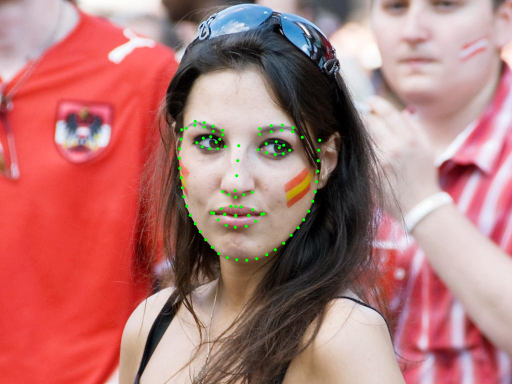

In [34]:
import copy
from inference.config import ModelConfig
from inference.framework import SPIGAFramework

# Load model and framework
dataset = 'wflw'
model_cfg = ModelConfig(dataset)
processor = SPIGAFramework(model_cfg)

# Forward
features = processor.inference(image, [bbox])
landmarks = np.array(features['landmarks'][0])

# Plot landmarks
canvas = copy.deepcopy(image)
for xy in landmarks:
    xy = np.array(xy + 0.5, dtype=int)
    canvas = cv2.circle(canvas, (xy[0], xy[1]), 3, (0, 255, 0), -1)

# Show image results
(h, w) = canvas.shape[:2]
canvas = cv2.resize(canvas, (512, int(h*512/w)))
cv2_imshow(canvas)
